In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("ex2data1.txt", names=['mark1', 'mark2', 'status'])
df.head()

,mark1,mark2,status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'mark 2')

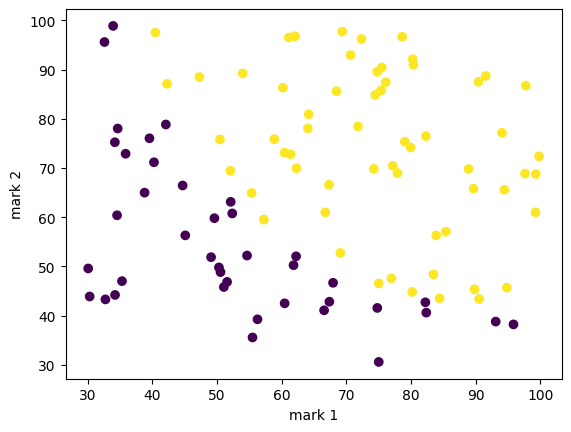

In [4]:
plt.scatter(df['mark1'], df['mark2'], c = df['status'])
plt.xlabel('mark 1')
plt.ylabel('mark 2')

In [5]:
def g(z):
    return 1/(1 + np.exp(-z))

def h(theta, x):
    return g(theta[0] + theta[1]*x[0] + theta[2]*x[1])

In [6]:
def loss_func(theta, x, y):
    temp = 0
    for i in range(x.shape[0]):
        temp += -y[i]*np.log(h(theta, x[i])) - (1-y[i])*np.log(1-h(theta, x[i]))
    return 1/y.size * temp

In [7]:
x = df[['mark1', 'mark2']].values
x[:, 0] = 1 /x[:, 0]

y = df['status'].values

In [8]:
def grad_desc(loss_func, h, theta, x, y, a):
    loss_values = [loss_func(theta, x, y)]
    last_l = loss_func(theta, x, y) + 10
    while(np.abs(loss_func(theta, x, y) - last_l)>1e-6):
        last_l = loss_func(theta, x, y)
        loss_values.append(last_l)
        z0, z1, z2 = 0, 0, 0
        for i in range(y.shape[0]):
            z0 += h(theta, x[i]) - y[i]
            z1 += (h(theta, x[i]) - y[i])*x[i][0]
            z2 += (h(theta, x[i]) -y[i])*x[i][1]
        temp0 = a/x.shape[0] * z0
        temp1 = a/x.shape[0] * z1
        temp2 = a/x.shape[0] * z2
        theta[0] = theta[0] - temp0
        theta[1] = theta[1] - temp1
        theta[2] = theta[2] - temp2
        #print(last_l)
    return theta, loss_values

Text(0, 0.5, 'loss function value')

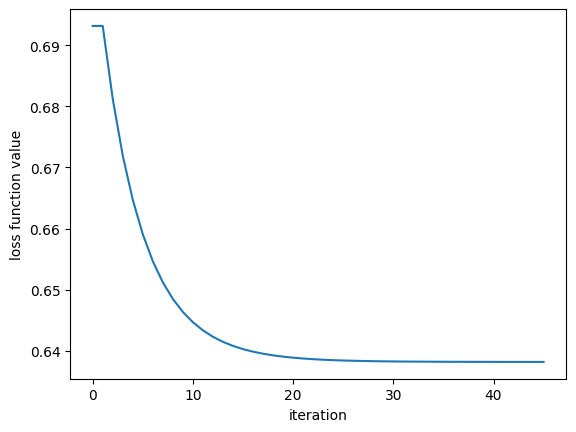

In [9]:
theta = [0., 0., 0.]
theta, loss_values = grad_desc(loss_func, h, theta, x, y, 0.0001)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel("iteration")
plt.ylabel("loss function value")